# Visualize Direction

Import all Libraries

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import folium

In [7]:
# Sallstraße 22	
sall = 52.3676368, 9.7545293

# Volgersweg
volgers = 52.37920968780963, 9.751001238611659

lat1, lon1 = sall
lat2, lon2 = volgers

north_heading = 158

North Heading: 158
Bearing: 349.4582391180572
Heading: 507.4582391180572


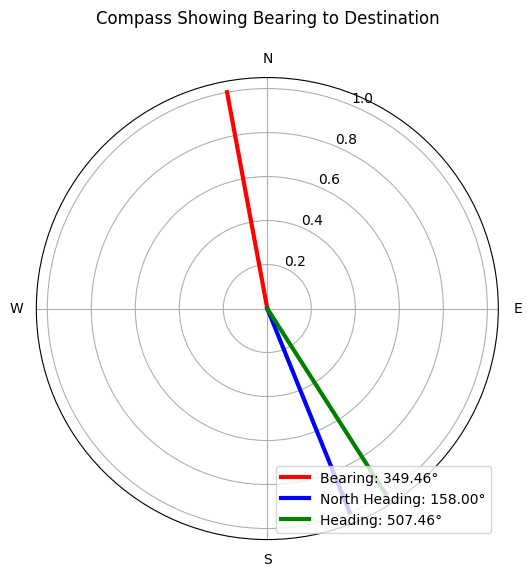

In [8]:
# Function to calculate the bearing between two points
def calculate_bearing(lat1, lon1, lat2, lon2):
    # Convert latitudes and longitudes from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Calculate the difference in longitude
    delta_lon = lon2 - lon1

    # Calculate the bearing
    x = np.sin(delta_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(delta_lon)
    bearing = np.arctan2(x, y)

    # Convert the bearing from radians to degrees
    bearing = np.degrees(bearing)

    # Normalize the bearing to 0-360 degrees
    bearing = (bearing + 360) % 360

    return bearing

# Function to plot the compass with bearing
def plot_compass(bearing, heading, north_heading):
    # Create a figure and polar subplot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
    
    # Set the compass
    ax.set_theta_zero_location('N')  # 0 degrees at the top (North)
    ax.set_theta_direction(-1)       # Clockwise direction

    # Plot the compass with labels
    ax.set_xticks(np.radians([0, 90, 180, 270]))
    ax.set_xticklabels(['N', 'E', 'S', 'W'])
    
    # Plot the bearing
    ax.plot(np.radians([bearing, bearing]), [0, 1], color='red', linewidth=3, label=f'Bearing: {bearing:.2f}°')
    # Plot the north heading
    ax.plot(np.radians([north_heading, north_heading]), [0, 1], color='blue', linewidth=3, label=f'North Heading: {north_heading:.2f}°')
    # Plot the heading
    ax.plot(np.radians([heading, heading]), [0, 1], color='green', linewidth=3, label=f'Heading: {heading:.2f}°')

    # Plot decoration
    ax.legend(loc='lower right')
    plt.title(f'Compass Showing Bearing to Destination', pad=20)

    plt.show()



# Calculate the bearing between the two points
bearing = calculate_bearing(lat1, lon1, lat2, lon2)
heading = north_heading + bearing

print(f"North Heading: {north_heading}")
print(f"Bearing: {bearing}")
print(f"Heading: {heading}")



# Plot the compass
plot_compass(bearing, heading, north_heading)


In [9]:
# Function to create a map with a line showing the bearing between two points
def plot_on_map(lat1, lon1, lat2, lon2):
    # Create a map centered at the midpoint between the two points
    mid_lat = (lat1 + lat2) / 2
    mid_lon = (lon1 + lon2) / 2
    map_center = [mid_lat, mid_lon]
    
    # Create a folium map
    map_object = folium.Map(location=map_center, zoom_start=6)
    
    # Add markers for the two points
    folium.Marker([lat1, lon1], popup="Point 1").add_to(map_object)
    folium.Marker([lat2, lon2], popup="Point 2").add_to(map_object)
    
    # Add a line showing the bearing between the points
    folium.PolyLine(locations=[[lat1, lon1], [lat2, lon2]], color='red', weight=3).add_to(map_object)
    
    return map_object

# Plot the map with the line connecting San Francisco and Los Angeles
map_object = plot_on_map(lat1, lon1, lat2, lon2)
map_object

In [10]:
def degrees_to_radians(degrees):
    return degrees * math.pi / 180.0

def calculate_direction(lat1, lat2, lon1, lon2):
    phi1 = degrees_to_radians(lat1)
    phi2 = degrees_to_radians(lat2)
    delta_lambda = degrees_to_radians(lon2 - lon1)

    y = math.sin(delta_lambda) * math.cos(phi2)
    x = math.cos(phi1) * math.sin(phi2) - math.sin(phi1) * math.cos(phi2) * math.cos(delta_lambda)
    c = math.atan2(y, x)

    return c * (180.0 / math.pi)

calculate_direction(lat1, lat2, lon1, lon2)

-10.541760881939027